# **1. Import Yelp Libraries & Files**  <a class="anchor" id="1"></a>

In [2]:
import requests
import os
import zipfile
import tarfile

# 1. Download (If needed)
url = "https://business.yelp.com/external-assets/files/Yelp-JSON.zip"
filename = "Yelp-JSON.zip"

if not os.path.exists(filename) and not os.path.exists('yelp_academic_dataset_business.json'):
    print(f"Downloading {filename}...")
    headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'}
    response = requests.get(url, stream=True, headers=headers)
    with open(filename, 'wb') as f:
        for chunk in response.iter_content(chunk_size=8192):
            f.write(chunk)
    print("Downloaded successfully.")
else:
    print("File already exists or downloaded.")

# 2. Extract ZIP (Pythonic way)
if os.path.exists(filename):
    print("Extracting ZIP...")
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall(".")
    print("ZIP Extracted.")

# 3. Extract TAR (Pythonic way)
tar_path = "Yelp JSON/yelp_dataset.tar"
if os.path.exists(tar_path):
    print("Extracting TAR...")
    try:
        with tarfile.open(tar_path, "r") as tar:
            tar.extractall()
        print("TAR Extracted.")
    except Exception as e:
        print(f"Tar extraction skipped or error: {e}")
elif os.path.exists("yelp_dataset.tar"):
    with tarfile.open("yelp_dataset.tar", "r") as tar:
        tar.extractall()
    print("TAR Extracted (root).")

Downloaded successfully.
Extracting ZIP...
ZIP Extracted.
Extracting TAR...


/tmp/ipython-input-1557165190.py:34: DeprecationWarning: Python 3.14 will, by default, filter extracted tar archives and reject files or modify their metadata. Use the filter argument to control this behavior.
  tar.extractall()


TAR Extracted.


In [3]:
import os
import requests
import zipfile

filename = "Yelp-JSON.zip"

# 1. Remove previous corrupted file (if it exists)
if os.path.exists(filename):
    try:
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            if zip_ref.testzip() is not None:
                raise zipfile.BadZipFile
        print("Zip file is valid.")
    except Exception:
        print("Corrupted zip file detected. Deleting and re-downloading...")
        os.remove(filename)

# 2. Re-download (only if the file does not exist)
if not os.path.exists(filename):
    print(f"Downloading {filename}...")
    url = "https://business.yelp.com/external-assets/files/Yelp-JSON.zip"

    # Header to prevent being blocked by the server
    headers = {
        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
    }

    try:
        response = requests.get(url, stream=True, headers=headers)
        response.raise_for_status() # Check for HTTP errors

        # Save the file
        with open(filename, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print("Download completed successfully.")
    except Exception as e:
        print(f"Download error: {e}")

# 3. Attempt extraction
if os.path.exists(filename):
    try:
        print("Extracting ZIP...")
        with zipfile.ZipFile(filename, 'r') as zip_ref:
            zip_ref.extractall(".")
        print("ZIP Extracted Successfully!")
    except zipfile.BadZipFile:
        print("❌ Error: The downloaded file is still corrupted. The download link may have expired.")

Zip file is valid.
Extracting ZIP...
ZIP Extracted Successfully!


In [4]:
import pandas as pd
import os
import random
import io

# Redefine the paths to the JSON files (assuming they are in the current directory)
business_file = 'yelp_academic_dataset_business.json'
review_file = 'yelp_academic_dataset_review.json'
user_file = 'yelp_academic_dataset_user.json'

# Define sampling rates
sample_rate_business = 0.50 # 50% for business file
sample_rate_large = 0.10    # 10% for review and user files

# --- Re-Sample and Load DataFrames ---
if os.path.exists(business_file):
    print(f"Re-sampling and loading {business_file} with rate {sample_rate_business*100}%...")
    sampled_business_lines = []
    with open(business_file, 'r', encoding='utf-8') as f:
        for line in f:
            if random.random() < sample_rate_business:
                sampled_business_lines.append(line)
    df_business_sampled = pd.read_json(io.StringIO(''.join(sampled_business_lines)), lines=True)
    print("df_business_sampled shape:", df_business_sampled.shape)
else:
    print(f"ERROR: {business_file} not found. Please check extraction step.")

if os.path.exists(review_file):
    print(f"Re-sampling and loading {review_file} with rate {sample_rate_large*100}%...")
    sampled_review_lines = []
    with open(review_file, 'r', encoding='utf-8') as f:
        for line in f:
            if random.random() < sample_rate_large:
                sampled_review_lines.append(line)
    df_review_sampled = pd.read_json(io.StringIO(''.join(sampled_review_lines)), lines=True)
    print("df_review_sampled shape:", df_review_sampled.shape)
else:
    print(f"ERROR: {review_file} not found.")

if os.path.exists(user_file):
    print(f"Re-sampling and loading {user_file} with rate {sample_rate_large*100}%...")
    sampled_user_lines = []
    with open(user_file, 'r', encoding='utf-8') as f:
        for line in f:
            if random.random() < sample_rate_large:
                sampled_user_lines.append(line)
    df_user_sampled = pd.read_json(io.StringIO(''.join(sampled_user_lines)), lines=True)
    print("df_user_sampled shape:", df_user_sampled.shape)
else:
    print(f"ERROR: {user_file} not found.")

print("Data Loading Complete.")

Re-sampling and loading yelp_academic_dataset_business.json with rate 50.0%...
df_business_sampled shape: (75422, 14)
Re-sampling and loading yelp_academic_dataset_review.json with rate 10.0%...
df_review_sampled shape: (699410, 9)
Re-sampling and loading yelp_academic_dataset_user.json with rate 10.0%...
df_user_sampled shape: (198641, 22)
Data Loading Complete.


In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

# **2. Load data & Import New Libraries**  <a class="anchor" id="2"></a>

1. This section imports all the necessary tools for data manipulation (Pandas), visualization (Seaborn/Matplotlib), and machine learning (Sklearn).
2. This reads the reviews JSON file. To prevent memory issues and ensure faster processing, it randomly samples only 10% of the data.

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import os
import random
import io
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from wordcloud import WordCloud

# Download English language resources for text processing
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)
nltk.download('punkt', quiet=True)

# Set plot style
sns.set(style="whitegrid", palette="muted")
plt.rcParams['figure.figsize'] = (12, 6)

In [7]:
print("--- 1. Load Data ---")
review_file = 'yelp_academic_dataset_review.json'

if 'df_review_sampled' not in locals():
    if os.path.exists(review_file):
        sampled_review_lines = []
        with open(review_file, 'r', encoding='utf-8') as f:
            for line in f:
                if random.random() < 0.10: # Sample 10%
                    sampled_review_lines.append(line)
        df_review_sampled = pd.read_json(io.StringIO(''.join(sampled_review_lines)), lines=True)
    else:
        print("Dataset not found. Using dummy data for demonstration.")
        df_review_sampled = pd.DataFrame({'text': ['good']*50 + ['bad']*50, 'stars': [5]*50 + [1]*50})

--- 1. Load Data ---


# **3. Labeling (The New Logic)**  <a class="anchor" id="3"></a>

Here we define the target variable based on the new criteria: Stars 1 & 2 are Negative (0), and Stars 3, 4, & 5 are Positive (1).

Applying New Labeling Logic: 1-2 Stars = Negative, 3-5 Stars = Positive


/tmp/ipython-input-1728360187.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df_yelp, palette=['#e74c3c', '#2ecc71'])


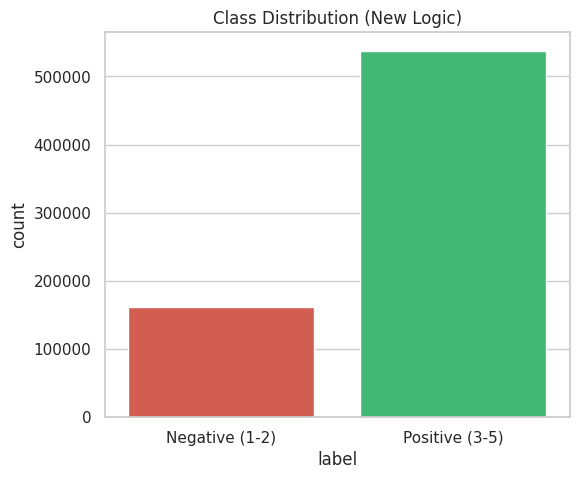

In [8]:
# Select relevant columns
df_yelp = df_review_sampled[['text', 'stars']].dropna()

print("Applying New Labeling Logic: 1-2 Stars = Negative, 3-5 Stars = Positive")
# Apply new logic: if stars >= 3, label is 1 (Positive), else 0 (Negative)
df_yelp['label'] = df_yelp['stars'].apply(lambda x: 1 if x >= 3 else 0)

# Visualize the new class distribution
plt.figure(figsize=(6, 5))
sns.countplot(x='label', data=df_yelp, palette=['#e74c3c', '#2ecc71'])
plt.xticks([0, 1], ['Negative (1-2)', 'Positive (3-5)'])
plt.title('Class Distribution (New Logic)')
plt.show()

# **4. Text Preprocessing**  <a class="anchor" id="4"></a>



This section cleans the text and visualizes the reduction in review length, showing how much "noise" (stopwords, punctuation) was removed.


--- 2. Text Preprocessing & Visualization ---


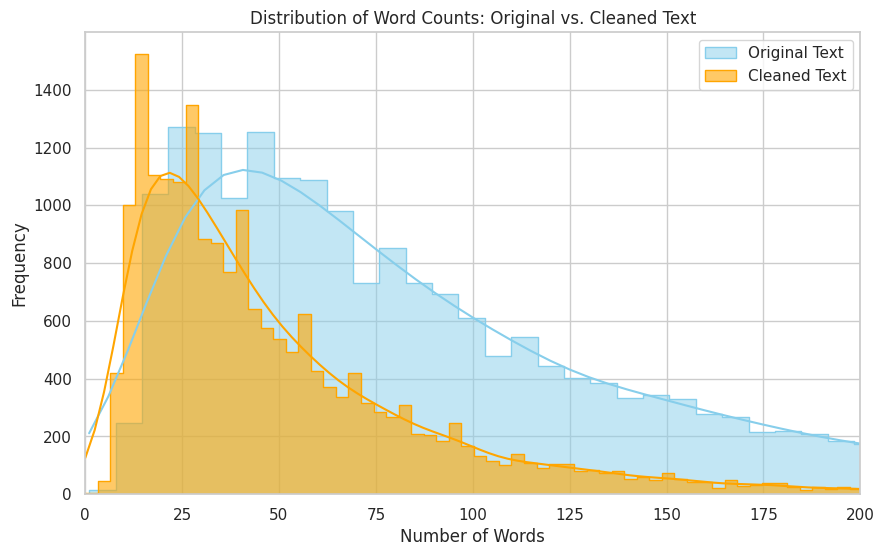

Average Word Count (Original): 105.6
Average Word Count (Cleaned):  52.3


In [14]:
print("\n--- 2. Text Preprocessing & Visualization ---")
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = str(text).lower()
    text = re.sub(r'[^a-z\s]', '', text) # Keep only letters
    words = text.split()
    # Remove stopwords and lemmatize
    cleaned_words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words and len(word) > 2]
    return " ".join(cleaned_words)

# Apply preprocessing
if len(df_yelp) > 20000:
    df_analysis = df_yelp.sample(20000, random_state=42).copy()
else:
    df_analysis = df_yelp.copy()

df_analysis['clean_text'] = df_analysis['text'].apply(preprocess_text)

# --- VISUALIZATION: Before vs After Cleaning ---
# Calculate lengths
df_analysis['original_len'] = df_analysis['text'].apply(lambda x: len(str(x).split()))
df_analysis['clean_len'] = df_analysis['clean_text'].apply(lambda x: len(str(x).split()))

# Plot
plt.figure(figsize=(10, 6))
sns.histplot(df_analysis['original_len'], color='skyblue', label='Original Text', kde=True, element="step", alpha=0.5)
sns.histplot(df_analysis['clean_len'], color='orange', label='Cleaned Text', kde=True, element="step", alpha=0.6)
plt.legend()
plt.title('Distribution of Word Counts: Original vs. Cleaned Text')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.xlim(0, 200) # Limit x-axis to see the main distribution clearly
plt.show()

print(f"Average Word Count (Original): {df_analysis['original_len'].mean():.1f}")
print(f"Average Word Count (Cleaned):  {df_analysis['clean_len'].mean():.1f}")

# **5. Word Cloud Visualization**  <a class="anchor" id="5"></a>

This generates visual representations of the most frequent words found in the newly defined Positive (3-5 stars) and Negative (1-2 stars) reviews.


--- 3. Word Clouds ---


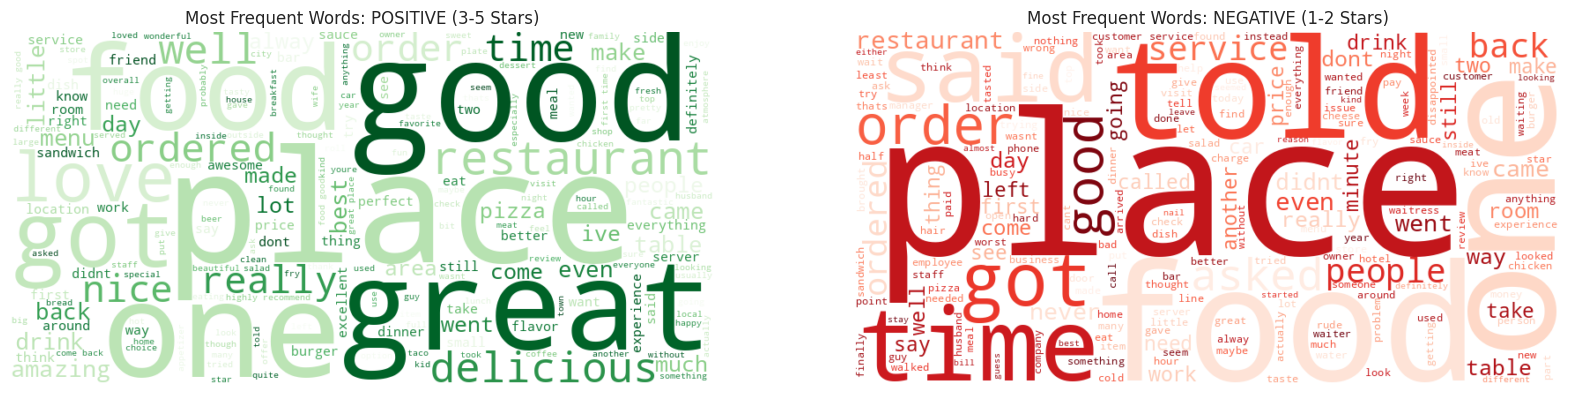

In [10]:
print("\n--- 3. Word Clouds ---")
fig, ax = plt.subplots(1, 2, figsize=(20, 10))

# Positive Word Cloud
pos_text = " ".join(df_analysis[df_analysis['label'] == 1]['clean_text'])
if len(pos_text) > 0:
    wordcloud_pos = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(pos_text)
    ax[0].imshow(wordcloud_pos, interpolation='bilinear')
    ax[0].axis('off')
    ax[0].set_title('Most Frequent Words: POSITIVE (3-5 Stars)')

# Negative Word Cloud
neg_text = " ".join(df_analysis[df_analysis['label'] == 0]['clean_text'])
if len(neg_text) > 0:
    wordcloud_neg = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(neg_text)
    ax[1].imshow(wordcloud_neg, interpolation='bilinear')
    ax[1].axis('off')
    ax[1].set_title('Most Frequent Words: NEGATIVE (1-2 Stars)')

plt.show()

# **6. Vectorization (TF-IDF)**  <a class="anchor" id="6"></a>

This section converts text into numerical vectors using TF-IDF. It also visualizes the top 20 most important words (features) based on their cumulative TF-IDF scores, showing what the model considers "significant".


--- 4. Feature Extraction (TF-IDF) & Visualization ---
Training Data Shape: (16000, 5000)
Testing Data Shape:  (4000, 5000)


/tmp/ipython-input-1145166630.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TF-IDF Score', y='Word', data=top_df, palette='magma')


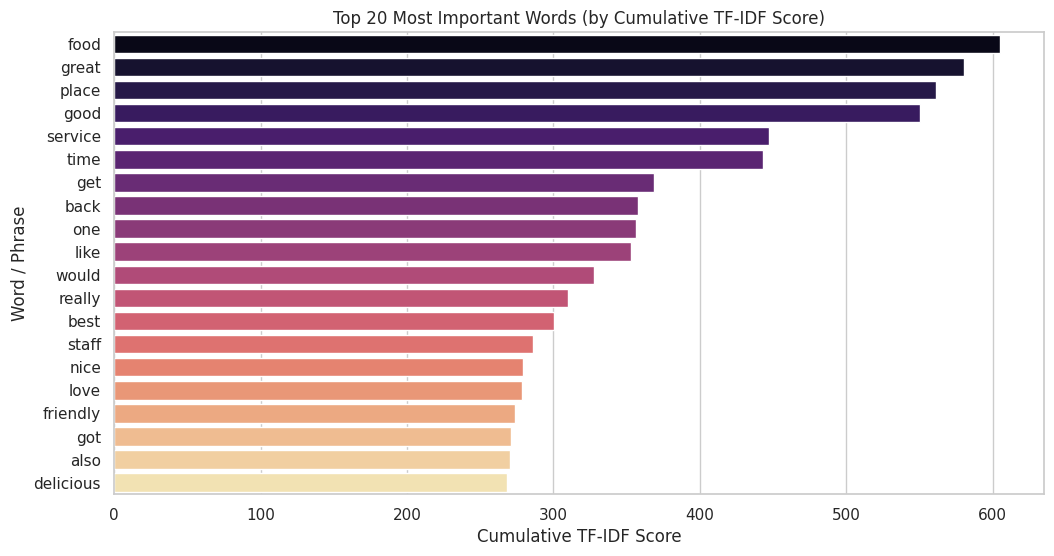

In [15]:
print("\n--- 4. Feature Extraction (TF-IDF) & Visualization ---")

# 1. Convert text to vectors
# We use ngram_range=(1, 2) to capture both single words and 2-word phrases
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf.fit_transform(df_analysis['clean_text'])
y = df_analysis['label']

# 2. Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training Data Shape: {X_train.shape}")
print(f"Testing Data Shape:  {X_test.shape}")

# --- VISUALIZATION: Top TF-IDF Features ---
# Sum TF-IDF scores for each term across all documents
sum_tfidf = X.sum(axis=0)
# Get feature names (words)
words_freq = [(word, sum_tfidf[0, idx]) for word, idx in tfidf.vocabulary_.items()]
# Sort by score
words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)

# Select top 20
top_words = words_freq[:20]
top_df = pd.DataFrame(top_words, columns=['Word', 'TF-IDF Score'])

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='TF-IDF Score', y='Word', data=top_df, palette='magma')
plt.title('Top 20 Most Important Words (by Cumulative TF-IDF Score)')
plt.xlabel('Cumulative TF-IDF Score')
plt.ylabel('Word / Phrase')
plt.show()

# **7. Model Training & Interpretation**  <a class="anchor" id="7"></a>

This section trains the Multinomial Naive Bayes model. It then visualizes the "Feature Importance" by extracting the words with the highest probability for each class (Positive vs. Negative), showing exactly what the model has learned.


--- 5. Model Training & Feature Importance ---
Model trained successfully!


/tmp/ipython-input-440439015.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Log Prob', y='Word', data=df_neg, ax=ax[0], palette='Reds_r')
/tmp/ipython-input-440439015.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Log Prob', y='Word', data=df_pos, ax=ax[1], palette='Greens_r')


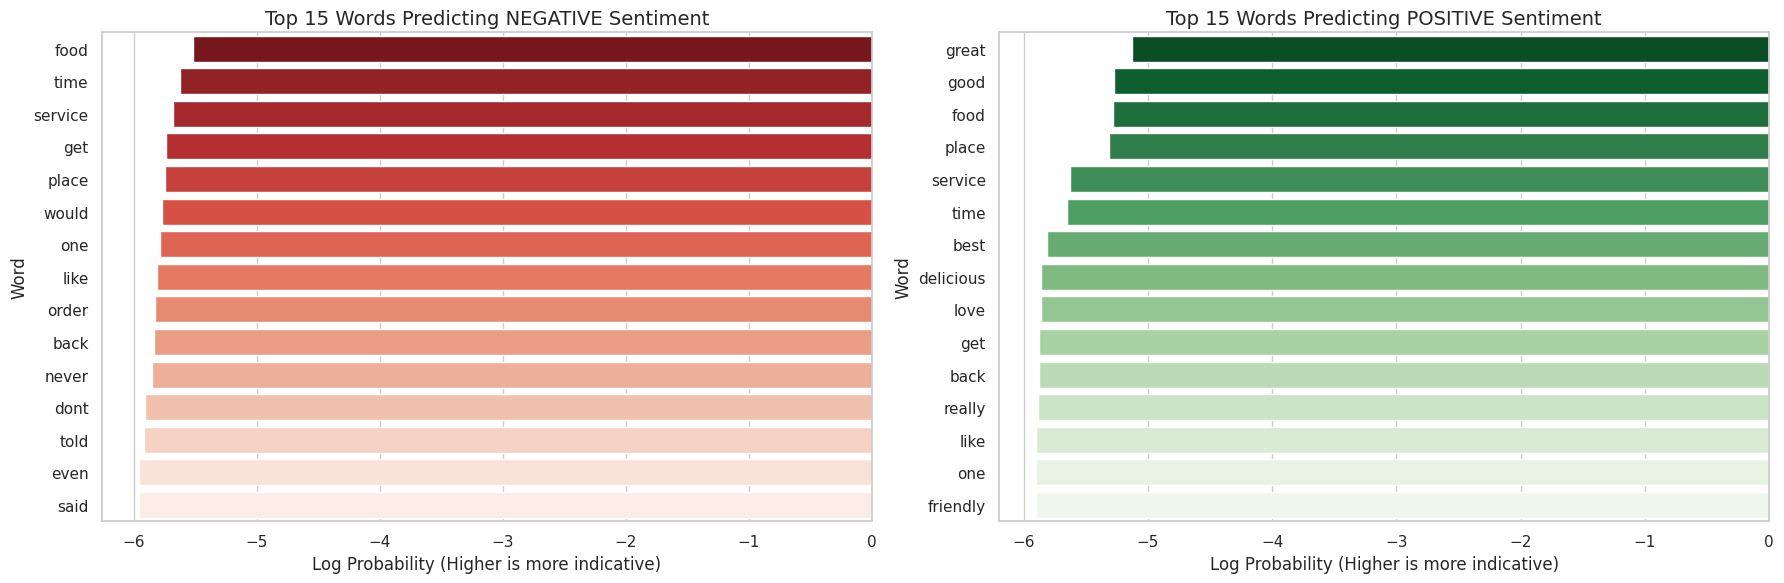

In [16]:
print("\n--- 5. Model Training & Feature Importance ---")

# 1. Train the Model
# MultinomialNB is standard for text classification with TF-IDF
model = MultinomialNB()
model.fit(X_train, y_train)
print("Model trained successfully!")

# --- VISUALIZATION: What did the model learn? ---
# Helper function to get top features for each class
def get_top_features(vectorizer, clf, n=15):
    feature_names = vectorizer.get_feature_names_out()
    # Get log probabilities
    neg_prob = clf.feature_log_prob_[0] # Class 0: Negative
    pos_prob = clf.feature_log_prob_[1] # Class 1: Positive

    # Sort and get top n indices
    top_neg_indices = neg_prob.argsort()[-n:][::-1]
    top_pos_indices = pos_prob.argsort()[-n:][::-1]

    top_neg_features = [(feature_names[i], neg_prob[i]) for i in top_neg_indices]
    top_pos_features = [(feature_names[i], pos_prob[i]) for i in top_pos_indices]

    return top_neg_features, top_pos_features

top_neg, top_pos = get_top_features(tfidf, model, n=15)

# Convert to DataFrame for plotting
df_neg = pd.DataFrame(top_neg, columns=['Word', 'Log Prob'])
df_pos = pd.DataFrame(top_pos, columns=['Word', 'Log Prob'])

# Plot
fig, ax = plt.subplots(1, 2, figsize=(18, 6))

# Negative Features
sns.barplot(x='Log Prob', y='Word', data=df_neg, ax=ax[0], palette='Reds_r')
ax[0].set_title('Top 15 Words Predicting NEGATIVE Sentiment', fontsize=14)
ax[0].set_xlabel('Log Probability (Higher is more indicative)')

# Positive Features
sns.barplot(x='Log Prob', y='Word', data=df_pos, ax=ax[1], palette='Greens_r')
ax[1].set_title('Top 15 Words Predicting POSITIVE Sentiment', fontsize=14)
ax[1].set_xlabel('Log Probability (Higher is more indicative)')

plt.tight_layout()
plt.show()

# **8. Evaluation & Metrics**  <a class="anchor" id="8"></a>

This final section evaluates the model's performance using a Classification Report, a Confusion Matrix, and an ROC Curve to visualize the trade-off between sensitivity and specificity.

Classification Report:
              precision    recall  f1-score   support

    Negative       0.84      0.62      0.72       912
    Positive       0.90      0.96      0.93      3088

    accuracy                           0.89      4000
   macro avg       0.87      0.79      0.82      4000
weighted avg       0.88      0.89      0.88      4000



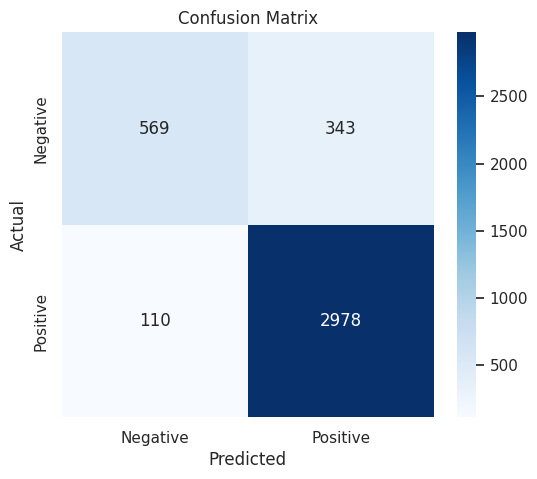

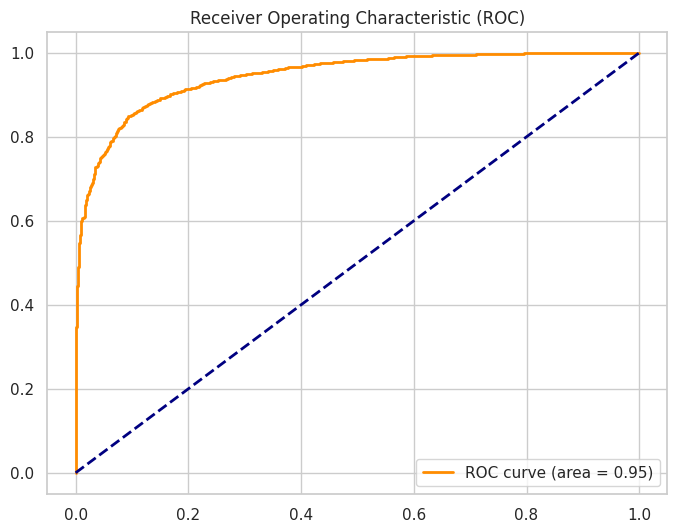

In [13]:
# 1. Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Negative', 'Positive']))

# 2. Confusion Matrix
plt.figure(figsize=(6, 5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# 3. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()